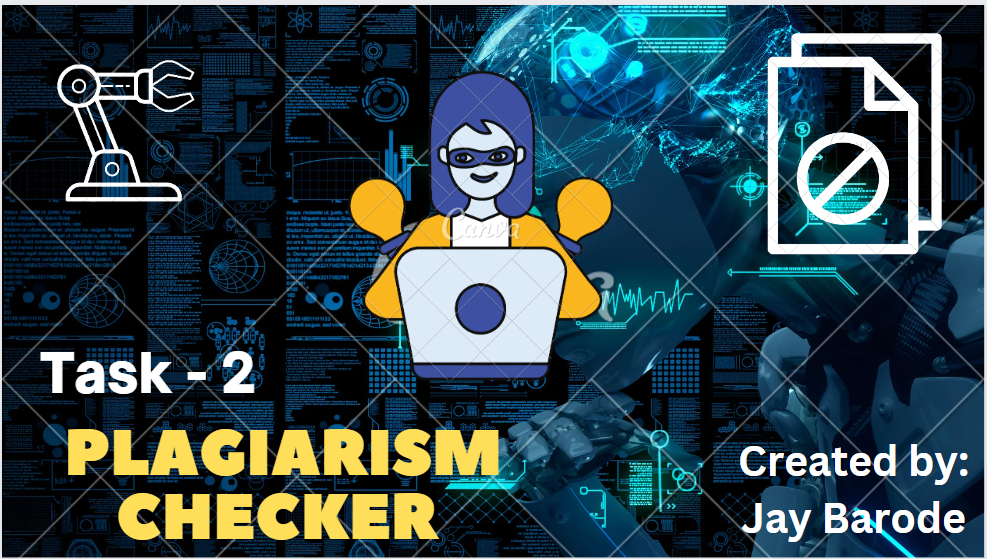

Importing the dependencies...

In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Loading the text files

In [3]:
files = [file for file in os.listdir() if file.endswith('.txt')]

In [4]:
files

['File5.txt', 'File3.txt', 'File2.txt', 'File4.txt', 'File1.txt']

In [8]:
file_content = [open(_file,encoding = 'utf-8').read() for _file in files]

In [9]:
file_content

['However, the rise of AI is not without its challenges. One of the main concerns is the potential for job displacement, as machines and robots are able to perform tasks that were once done by humans. There are also concerns about the ethical implications of AI, particularly as it becomes more sophisticated and autonomous.',
 'Another area where AI is making a significant impact is in the world of finance. Financial institutions are using AI to analyze data and make predictions about market trends, allowing them to make more informed decisions about investments. AI algorithms are also being used to detect fraud and other financial crimes, helping to protect consumers and businesses alike.',
 'One of the most significant applications of AI is in the field of healthcare. With the ability to analyze vast amounts of data, AI algorithms can help doctors to diagnose and treat patients more accurately and quickly. AI-powered robots are also being used to assist with surgeries and perform othe

Converting text data into numeric values

In [10]:
def vectorize(text):
  return TfidfVectorizer().fit_transform(text).toarray()

In [11]:
def similarity(doc1,doc2):
  return cosine_similarity([doc1,doc2])

In [12]:
vectors = vectorize(file_content)

In [13]:
vectors

array([[0.        , 0.14842816, 0.09940407, 0.        , 0.        ,
        0.        , 0.14145363, 0.        , 0.        , 0.        ,
        0.        , 0.08362184, 0.        , 0.        , 0.14145363,
        0.        , 0.        , 0.16724367, 0.        , 0.        ,
        0.19880814, 0.        , 0.14842816, 0.14842816, 0.        ,
        0.        , 0.1197509 , 0.        , 0.        , 0.14842816,
        0.        , 0.        , 0.        , 0.29685632, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.14842816, 0.        ,
        0.14842816, 0.        , 0.        , 0.        , 0.        ,
        0.14842816, 0.        , 0.        , 0.        , 0.14842816,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.14842816,
        0.        , 0.14842816, 0.        , 0.14842816, 0.        ,
        0.        , 0.        , 0.        , 0.  

In [14]:
file_vectors = list(zip(files,vectors))

In [15]:
file_vectors

[('File5.txt',
  array([0.        , 0.14842816, 0.09940407, 0.        , 0.        ,
         0.        , 0.14145363, 0.        , 0.        , 0.        ,
         0.        , 0.08362184, 0.        , 0.        , 0.14145363,
         0.        , 0.        , 0.16724367, 0.        , 0.        ,
         0.19880814, 0.        , 0.14842816, 0.14842816, 0.        ,
         0.        , 0.1197509 , 0.        , 0.        , 0.14842816,
         0.        , 0.        , 0.        , 0.29685632, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.14842816, 0.        ,
         0.14842816, 0.        , 0.        , 0.        , 0.        ,
         0.14842816, 0.        , 0.        , 0.        , 0.14842816,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.14842816,
         0.        , 0.14842816, 0.        , 0.14842816, 0.        ,
         0.        

In [34]:
plagiarism = set()

Checking Plagiarism

In [36]:
def check_plagiarism():
  global file_vectors
  for file_1,text_vector_1 in file_vectors:
    new_vectors = file_vectors.copy()
    c_index = new_vectors.index((file_1,text_vector_1))
    print(c_index) 
    del new_vectors[c_index]
    for file_2,text_vector_2 in new_vectors:
      similarity_score = similarity(text_vector_1,text_vector_2)[0][1]
      print(similarity(text_vector_1,text_vector_2)[0][1])
      file_pair = sorted((file_1,file_2))
      print(file_pair)
      score = (file_pair[0], file_pair[1], similarity_score)
      plagiarism.add(score)
  return plagiarism


In [37]:
for file in check_plagiarism():
  print(file)

0
0.19528382349829895
['File3.txt', 'File5.txt']
0.31428219351976694
['File2.txt', 'File5.txt']
0.24303315657942798
['File4.txt', 'File5.txt']
0.2940960999395789
['File1.txt', 'File5.txt']
1
0.19528382349829895
['File3.txt', 'File5.txt']
0.31379360962891256
['File2.txt', 'File3.txt']
0.2292848552454568
['File3.txt', 'File4.txt']
0.18552767159993686
['File1.txt', 'File3.txt']
2
0.31428219351976694
['File2.txt', 'File5.txt']
0.31379360962891256
['File2.txt', 'File3.txt']
0.19613236334950995
['File2.txt', 'File4.txt']
0.2912008690065451
['File1.txt', 'File2.txt']
3
0.24303315657942798
['File4.txt', 'File5.txt']
0.2292848552454568
['File3.txt', 'File4.txt']
0.19613236334950995
['File2.txt', 'File4.txt']
0.22624913205238437
['File1.txt', 'File4.txt']
4
0.2940960999395789
['File1.txt', 'File5.txt']
0.18552767159993686
['File1.txt', 'File3.txt']
0.2912008690065451
['File1.txt', 'File2.txt']
0.22624913205238437
['File1.txt', 'File4.txt']
('File4.txt', 'File5.txt', 0.24303315657942798)
('File2.